In [1]:
try:
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U torch torchvision --extra-index-url https://download.pytorch.org/whl/cu113
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

from torch import nn
from torchinfo import summary
import matplotlib.pyplot as plt
import sys
from torchinfo import summary

# local imports
from utils import *
from train_model import *
from data import *

import cnn
import densenet
import mobilenet
import VGG

torch version: 2.0.0+cu117
torchvision version: 0.15.1+cu117
torch.Size([32, 10])


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
image_path = './dataset/'

train_dir = image_path+"train"
test_dir = image_path+"test"

train_dir, test_dir

('./dataset/train', './dataset/test')

In [4]:
walk_through_dir(train_dir)

There are 10 directories and 0 images in './dataset/train'.
There are 0 directories and 800 images in './dataset/train\Atopic Dermatitis'.
There are 0 directories and 800 images in './dataset/train\Basal Cell Carcinoma (BCC)'.
There are 0 directories and 800 images in './dataset/train\Benign Keratosis-like Lesions (BKL)'.
There are 0 directories and 800 images in './dataset/train\Eczema'.
There are 0 directories and 800 images in './dataset/train\Melanocytic Nevi (NV)'.
There are 0 directories and 800 images in './dataset/train\Melanoma'.
There are 0 directories and 800 images in './dataset/train\Psoriasis'.
There are 0 directories and 800 images in './dataset/train\Seborrheic Keratoses'.
There are 0 directories and 800 images in './dataset/train\Tinea Ringworm Candidiasis'.
There are 0 directories and 800 images in './dataset/train\Warts Molluscum and other Viral Infections'.


In [5]:
walk_through_dir(test_dir)

There are 10 directories and 0 images in './dataset/test'.
There are 0 directories and 200 images in './dataset/test\Atopic Dermatitis'.
There are 0 directories and 200 images in './dataset/test\Basal Cell Carcinoma (BCC)'.
There are 0 directories and 200 images in './dataset/test\Benign Keratosis-like Lesions (BKL)'.
There are 0 directories and 200 images in './dataset/test\Eczema'.
There are 0 directories and 200 images in './dataset/test\Melanocytic Nevi (NV)'.
There are 0 directories and 200 images in './dataset/test\Melanoma'.
There are 0 directories and 200 images in './dataset/test\Psoriasis'.
There are 0 directories and 200 images in './dataset/test\Seborrheic Keratoses'.
There are 0 directories and 200 images in './dataset/test\Tinea Ringworm Candidiasis'.
There are 0 directories and 200 images in './dataset/test\Warts Molluscum and other Viral Infections'.


In [6]:
IMG_SIZE = 224

manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])           
print(f"Manually created transforms: {manual_transforms}")

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
)


In [7]:
BATCH_SIZE = 4

train_dataloader, test_dataloader, class_names = create_dataloader(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms, # use manually created transforms
    batch_size=BATCH_SIZE
)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x16a3c98f3a0>,
 ['Atopic Dermatitis',
  'Basal Cell Carcinoma (BCC)',
  'Benign Keratosis-like Lesions (BKL)',
  'Eczema',
  'Melanocytic Nevi (NV)',
  'Melanoma',
  'Psoriasis',
  'Seborrheic Keratoses',
  'Tinea Ringworm Candidiasis',
  'Warts Molluscum and other Viral Infections'])

In [8]:
# Get a batch of images
image_batch, label_batch = next(iter(train_dataloader))

# Get a single image from the batch
image, label = image_batch[0], label_batch[0]

# View the batch shapes
image.shape, label

(torch.Size([3, 224, 224]), tensor(5))

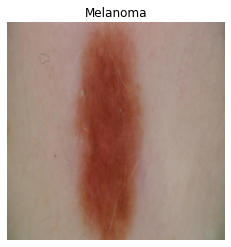

In [9]:
plt.imshow(image.permute(1, 2, 0)) # rearrange image dimensions to suit matplotlib [color_channels, height, width] -> [height, width, color_channels]
plt.title(class_names[label])
plt.axis(False);

In [10]:
cnn_model = cnn.CNN(input_shape=(224,224,3), num_classes=10)
cnn_model

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=100352, out_features=512, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)

In [11]:
summary(model=cnn_model, 
        input_size=(32, 3, 224, 224), # (batch_size, color_channels, height, width)
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\torchinfo\torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
CNN (CNN)                                [32, 3, 224, 224]    [32, 10]             --                   True
├─Conv2d (conv1)                         [32, 3, 224, 224]    [32, 32, 224, 224]   896                  True
├─MaxPool2d (pool1)                      [32, 32, 224, 224]   [32, 32, 112, 112]   --                   --
├─Conv2d (conv2)                         [32, 32, 112, 112]   [32, 64, 112, 112]   18,496               True
├─MaxPool2d (pool2)                      [32, 64, 112, 112]   [32, 64, 56, 56]     --                   --
├─Conv2d (conv3)                         [32, 64, 56, 56]     [32, 128, 56, 56]    73,856               True
├─MaxPool2d (pool3)                      [32, 128, 56, 56]    [32, 128, 28, 28]    --                   --
├─Linear (fc1)                           [32, 100352]         [32, 512]            51,380,736           True
├─Dropout (dropout) 

In [12]:
optimizer = torch.optim.Adam(params=cnn_model.parameters(), 
                             lr=1e-5)
loss_fn = torch.nn.CrossEntropyLoss()
set_seed()
results = train(model=cnn_model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=20,
                       device=device)

  0%|          | 0/25 [00:00<?, ?it/s]

KeyboardInterrupt: 

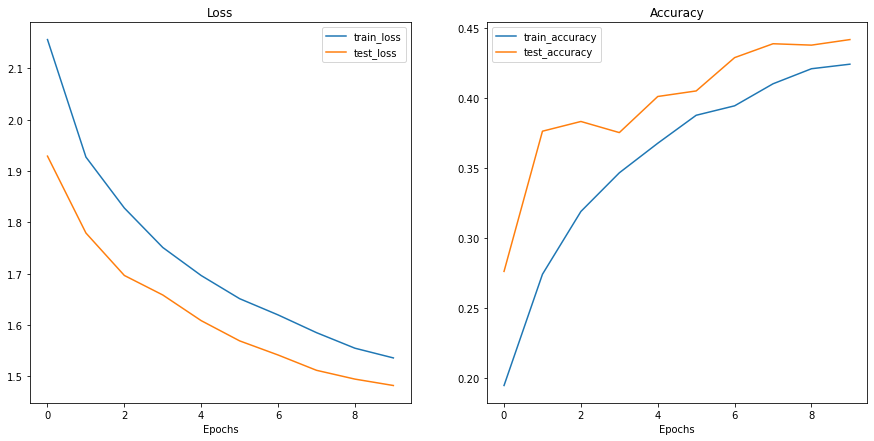

In [15]:
plot_loss_curves(results)


In [14]:
densenet_model = densenet.MyModel(num_classes=10)
densenet_model

MyModel(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU(inplace=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU(inplace=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU(inplace=True)
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True

In [15]:
summary(model=densenet_model, 
        input_size=(32, 3, 224, 224), # (batch_size, color_channels, height, width)
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\torchinfo\torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
MyModel (MyModel)                        [32, 3, 224, 224]    [32, 10]             --                   True
├─Conv2d (conv1)                         [32, 3, 224, 224]    [32, 64, 224, 224]   1,792                True
├─BatchNorm2d (bn1)                      [32, 64, 224, 224]   [32, 64, 224, 224]   128                  True
├─ReLU (relu1)                           [32, 64, 224, 224]   [32, 64, 224, 224]   --                   --
├─MaxPool2d (pool1)                      [32, 64, 224, 224]   [32, 64, 112, 112]   --                   --
├─Conv2d (conv2)                         [32, 64, 112, 112]   [32, 128, 112, 112]  73,856               True
├─BatchNorm2d (bn2)                      [32, 128, 112, 112]  [32, 128, 112, 112]  256                  True
├─ReLU (relu2)                           [32, 128, 112, 112]  [32, 128, 112, 112]  --                   --
├─MaxPool2d (pool2) 

In [9]:
optimizer = torch.optim.Adam(params=densenet_model.parameters(), 
                             lr=1e-5)
loss_fn = torch.nn.CrossEntropyLoss()
set_seed()
results = train(model=densenet_model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=20,
                       device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.9383 | train_acc: 0.2853 | test_loss: 1.7205 | test_acc: 0.3765
Epoch: 2 | train_loss: 1.7990 | train_acc: 0.3478 | test_loss: 1.6843 | test_acc: 0.3765
Epoch: 3 | train_loss: 1.7500 | train_acc: 0.3646 | test_loss: 1.6144 | test_acc: 0.3970
Epoch: 4 | train_loss: 1.6869 | train_acc: 0.3925 | test_loss: 1.5377 | test_acc: 0.4415


In [ ]:
plot_loss_curves(results)

In [8]:
mobilenet_model = mobilenet.MobileNet(num_classes=10)
mobilenet_model

MobileNet(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): ZeroPad2d((0, 1, 0, 1))
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): ZeroPad2d((0, 1, 0, 1))
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): ZeroPad2d((0, 1, 0, 1))
    (9): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace=True)
    (11): ZeroPad2d((0, 1, 0, 1))
    (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): ZeroPad2d((0, 1, 0, 1))
    (15): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (16): ReLU(inplace=True)
    (17): ZeroPad2d((0, 1, 0, 1))
    (18): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (19): ReLU(inplace=True)
    (20): ZeroPad2d((0, 1,

In [16]:
summary(model=mobilenet_model, 
        input_size=(32, 3, 224, 224), # (batch_size, color_channels, height, width)
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
MobileNet (MobileNet)                    [32, 3, 224, 224]    [32, 10]             --                   True
├─Sequential (features)                  [32, 3, 224, 224]    [32, 1024, 1, 1]     --                   True
│    └─Conv2d (0)                        [32, 3, 224, 224]    [32, 32, 112, 112]   896                  True
│    └─ReLU (1)                          [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─ZeroPad2d (2)                     [32, 32, 112, 112]   [32, 32, 113, 113]   --                   --
│    └─Conv2d (3)                        [32, 32, 113, 113]   [32, 64, 113, 113]   18,496               True
│    └─ReLU (4)                          [32, 64, 113, 113]   [32, 64, 113, 113]   --                   --
│    └─ZeroPad2d (5)                     [32, 64, 113, 113]   [32, 64, 114, 114]   --                   --
│    └─Conv2d (6)     

In [9]:
optimizer = torch.optim.Adam(params=mobilenet_model.parameters(), 
                             lr=1e-5)
loss_fn = torch.nn.CrossEntropyLoss()
set_seed()
results = train(model=mobilenet_model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=20,
                       device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.1089 | train_acc: 0.1710 | test_loss: 1.9900 | test_acc: 0.2345


KeyboardInterrupt: 

In [ ]:
plot_loss_curves(results)

In [11]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights 
efficientnet_model = torchvision.models.efficientnet_b0(weights=weights).to(device)

for param in efficientnet_model.features.parameters():
    param.requires_grad = False

    torch.manual_seed(42)
torch.cuda.manual_seed(42)

efficientnet_model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True), 
    torch.nn.Linear(in_features=1280, 
                    out_features=10, # same number of output units as our number of classes
                    bias=True)).to(device)

loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(params=efficientnet_model.parameters(), lr=1e-5)



In [17]:
summary(model=efficientnet_model, 
        input_size=(32, 3, 224, 224), # (batch_size, color_channels, height, width)
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 10]             --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

In [18]:
set_seed()
results = train(model=mobilenet_model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=20,
                       device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.0084 | train_acc: 0.2142 | test_loss: 1.9760 | test_acc: 0.2420


KeyboardInterrupt: 

In [ ]:
plot_loss_curves(results)

In [4]:
VGG_model = VGG.VGG11(num_classes=10)
VGG_model

VGG11(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

In [5]:
summary(model=VGG_model, 
        input_size=(32, 3, 224, 224), # (batch_size, color_channels, height, width)
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\torchinfo\torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
VGG11 (VGG11)                            [32, 3, 224, 224]    [32, 10]             --                   True
├─Sequential (features)                  [32, 3, 224, 224]    [32, 512, 7, 7]      --                   True
│    └─Conv2d (0)                        [32, 3, 224, 224]    [32, 64, 224, 224]   1,792                True
│    └─ReLU (1)                          [32, 64, 224, 224]   [32, 64, 224, 224]   --                   --
│    └─MaxPool2d (2)                     [32, 64, 224, 224]   [32, 64, 112, 112]   --                   --
│    └─Conv2d (3)                        [32, 64, 112, 112]   [32, 128, 112, 112]  73,856               True
│    └─ReLU (4)                          [32, 128, 112, 112]  [32, 128, 112, 112]  --                   --
│    └─MaxPool2d (5)                     [32, 128, 112, 112]  [32, 128, 56, 56]    --                   --
│    └─Conv2d (6)     

In [9]:
optimizer = torch.optim.Adam(params=VGG_model.parameters(), 
                             lr=1e-5)
loss_fn = torch.nn.CrossEntropyLoss()
set_seed()
results = train(model=VGG_model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=20,
                       device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.0191 | train_acc: 0.2046 | test_loss: 1.8010 | test_acc: 0.2995


KeyboardInterrupt: 

In [ ]:
plot_loss_curves(results)